In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("Students data.csv")

In [3]:
df

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2


In [4]:
df.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [5]:
df.columns

Index(['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1',
       'Calculus2', 'Statistics', 'Probability', 'Measure',
       'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y'],
      dtype='object')

In [6]:
df.describe()

,ID,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1193.000000,1.790476,82.957048,76.057143,71.961905,78.942857,85.133333,83.876190,80.761905,75.323810,0.504762,0.714286
std,30.454885,1.673867,6.053187,11.722618,12.197039,14.997326,10.269509,10.514363,10.296119,13.003324,0.889293,0.828742
min,1141.000000,1.000000,63.490000,46.000000,38.000000,17.000000,51.000000,29.000000,54.000000,9.000000,0.000000,0.000000
25%,1167.000000,1.000000,79.340000,67.000000,64.000000,71.000000,80.000000,79.000000,74.000000,67.000000,0.000000,0.000000
50%,1193.000000,1.000000,84.110000,76.000000,73.000000,83.000000,87.000000,85.000000,81.000000,76.000000,0.000000,0.000000
75%,1219.000000,1.000000,87.300000,84.000000,80.000000,91.000000,92.000000,92.000000,89.000000,85.000000,0.000000,1.000000
max,1245.000000,7.000000,93.710000,98.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,3.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [8]:
df.isna().sum()

ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64

In [9]:
df.isnull().sum()

ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64

In [10]:
df.ID.nunique()

105

In [11]:
df.race.nunique()

7

In [12]:
df.race.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [13]:
df.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [14]:
df.set_index('ID')

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2


In [15]:
df

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2


In [16]:
df_male = df.query('gender =="male"')

In [17]:
df_female = df.query('gender == "female"')

In [18]:
df_male.shape

(37, 17)

In [19]:
df_female.shape

(68, 17)

In [20]:
df_male = df_male.set_index('ID')

In [21]:
df_male.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0
1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1
1151,A,male,1,76.83,61,66,61,69,65,69,67,H,B,A,0,0
1154,A,male,1,80.08,67,65,74,73,87,68,76,E,B,A,0,2


In [22]:
df_male.corr()

C:\Users\KoDaKs\AppData\Local\Temp\ipykernel_10052\3163129408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_male.corr()


,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
race,1.000000,-0.182679,-0.256840,-0.108651,-0.075621,-0.124414,-0.175380,-0.140660,0.002710,-0.064311,0.018969
GPA,-0.182679,1.000000,0.731777,0.612714,0.823283,0.686420,0.719521,0.756899,0.793837,-0.357184,0.291511
Algebra,-0.256840,0.731777,1.000000,0.635353,0.605209,0.753965,0.779083,0.750219,0.447113,-0.194742,0.217015
Calculus1,-0.108651,0.612714,0.635353,1.000000,0.691906,0.496349,0.559038,0.451977,0.327053,0.041373,0.015726
Calculus2,-0.075621,0.823283,0.605209,0.691906,1.000000,0.544997,0.543542,0.615093,0.705456,-0.091578,0.141143
Statistics,-0.124414,0.686420,0.753965,0.496349,0.544997,1.000000,0.723727,0.623501,0.375941,-0.229927,0.273019
Probability,-0.175380,0.719521,0.779083,0.559038,0.543542,0.723727,1.000000,0.708669,0.417648,-0.054715,0.167437
Measure,-0.140660,0.756899,0.750219,0.451977,0.615093,0.623501,0.708669,1.000000,0.587001,-0.245126,0.226440
Functional_analysis,0.002710,0.793837,0.447113,0.327053,0.705456,0.375941,0.417648,0.587001,1.000000,-0.458534,0.294017
from4,-0.064311,-0.357184,-0.194742,0.041373,-0.091578,-0.229927,-0.054715,-0.245126,-0.458534,1.000000,-0.354940


<AxesSubplot: title={'center': 'Number of Gender in each class'}, xlabel='gender'>

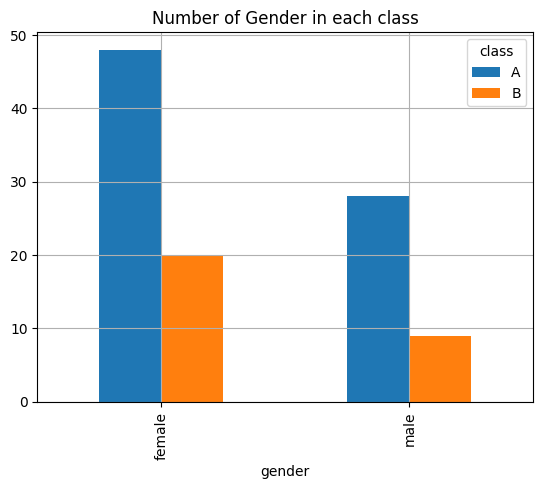

In [23]:
df[df.gender.isin(
    ['male', 'female']
)].groupby(
    ['gender', 'class']
).gender.count().unstack().plot(kind='bar', title='Number of Gender in each class', grid=True)

In [24]:
df_female.GPA.sum()

5681.96

In [25]:
df_male.GPA.sum()

3028.53

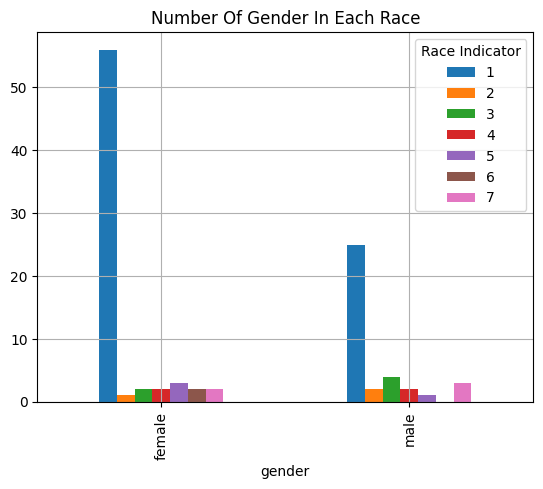

In [26]:
df[df.gender.isin(
    ['male', 'female']
)].groupby(
    ['gender', 'race']
).gender.count().unstack().plot(kind='bar', title='Number Of Gender In Each Race', grid=True, fontsize=10)
plt.legend(title='Race Indicator', fontsize=10)

In [27]:
df.head(10)

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
5,1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0
6,1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1
7,1148,A,female,5,64.75,60,38,60,63,70,68,51,H,B,C,0,0
8,1149,B,female,5,77.92,61,60,66,68,80,78,71,I,B,A,0,0
9,1150,A,female,5,76.50,60,61,60,69,73,60,62,H,B,A,0,0


In [28]:
df_GPA1 = pd.DataFrame(columns=['Gender','GPA'])

In [29]:
df_GPA1.loc[1] = { 'Gender': 'Male', "GPA" : df_male.GPA.sum()}
df_GPA1.loc[2] = {'Gender' : 'Female', 'GPA' : df_female.GPA.sum()}

In [30]:
df_GPA1

,Gender,GPA
1,Male,3028.53
2,Female,5681.96


In [31]:
df_GPA1 = df_GPA1.set_index('Gender')

<AxesSubplot: xlabel='Gender'>

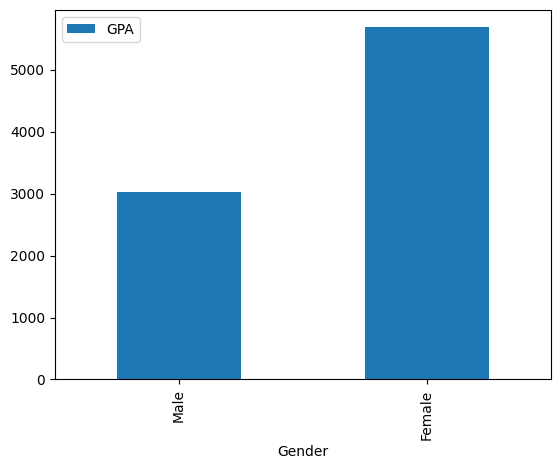

In [32]:
df_GPA1.plot(kind='bar')

In [33]:
df.GPA.nunique()

103

In [34]:
df.GPA.idxmax()

104

In [35]:
df.GPA.idxmin()

78

In [36]:
df = df.set_index('ID')

In [37]:
df.GPA.idxmax()

1245

In [38]:
df.tail(30)

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1216,A,female,1,91.90,95,86,96,92,95,90,95,Z,B,A,2,1
1217,A,female,1,87.77,91,68,87,92,92,90,77,V,A,A,0,1
1218,A,female,1,84.68,73,73,94,92,92,81,74,X,A,A,2,1
1219,A,male,1,63.49,81,61,17,92,88,69,9,T,B,D,2,0
1220,A,female,3,89.95,87,87,92,92,90,92,84,P,B,A,2,1
1221,A,female,1,85.18,75,70,73,92,84,76,88,X,A,A,2,0
1222,B,female,6,85.84,82,77,86,92,90,80,86,X,B,D,0,2
1223,B,male,1,84.18,84,67,94,92,82,83,85,U,B,A,0,1
1224,A,female,1,85.00,76,75,83,93,85,75,89,W,A,A,0,2


<i>Male dominants with the highest GPA and also with the lowest GPA

In [39]:
df.sort_values(by='GPA', ascending=True)

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1219,A,male,1,63.49,81,61,17,92,88,69,9,T,B,D,2,0
1148,A,female,5,64.75,60,38,60,63,70,68,51,H,B,C,0,0
1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,A,female,1,91.61,93,82,95,95,94,100,93,Y,B,S,0,1
1237,A,male,2,91.74,94,100,96,97,95,94,93,C,B,S,0,2
1216,A,female,1,91.90,95,86,96,92,95,90,95,Z,B,A,2,1


In [40]:
df.corr()

C:\Users\KoDaKs\AppData\Local\Temp\ipykernel_10052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
race,1.000000,-0.246571,-0.249298,-0.192550,-0.173228,-0.179594,-0.229312,-0.186478,-0.102435,-0.154352,0.011883
GPA,-0.246571,1.000000,0.761590,0.660560,0.803865,0.740903,0.732898,0.758676,0.809451,-0.052361,0.292536
Algebra,-0.249298,0.761590,1.000000,0.608083,0.640578,0.759595,0.752480,0.755499,0.572575,-0.078426,0.257051
Calculus1,-0.192550,0.660560,0.608083,1.000000,0.588929,0.547605,0.484766,0.471347,0.430825,0.034589,0.125429
Calculus2,-0.173228,0.803865,0.640578,0.588929,1.000000,0.640908,0.638694,0.658728,0.672529,0.002183,0.154947
Statistics,-0.179594,0.740903,0.759595,0.547605,0.640908,1.000000,0.716918,0.644505,0.469362,-0.092722,0.296005
Probability,-0.229312,0.732898,0.752480,0.484766,0.638694,0.716918,1.000000,0.704155,0.547730,0.074619,0.245288
Measure,-0.186478,0.758676,0.755499,0.471347,0.658728,0.644505,0.704155,1.000000,0.596535,-0.066559,0.229720
Functional_analysis,-0.102435,0.809451,0.572575,0.430825,0.672529,0.469362,0.547730,0.596535,1.000000,-0.138165,0.254932
from4,-0.154352,-0.052361,-0.078426,0.034589,0.002183,-0.092722,0.074619,-0.066559,-0.138165,1.000000,-0.311258


<AxesSubplot: xlabel='ID'>

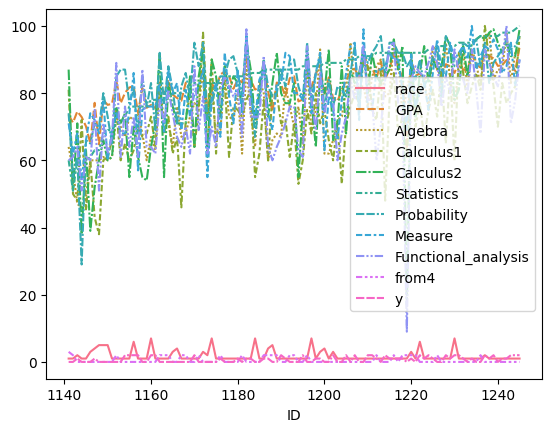

In [41]:
sns.lineplot(data=df)

In [42]:
df

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2


<AxesSubplot: xlabel='gender', ylabel='race'>

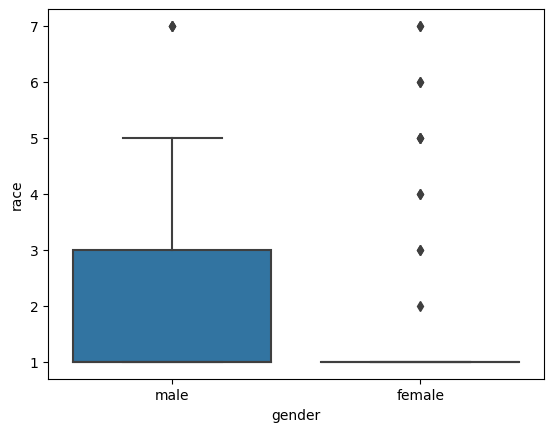

In [43]:
sns.boxplot(x=df['gender'], y = df['race'])

<AxesSubplot: xlabel='gender', ylabel='race'>

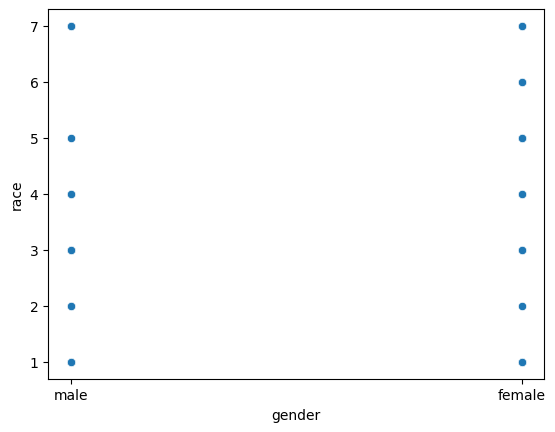

In [44]:
sns.scatterplot(x=df['gender'], y=df['race'])


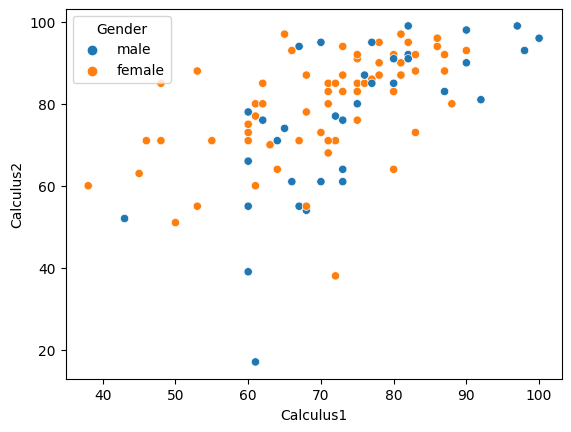

In [45]:
sns.scatterplot(x=df['Calculus1'], y = df['Calculus2'], hue= df['gender'])
plt.legend (title='Gender')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


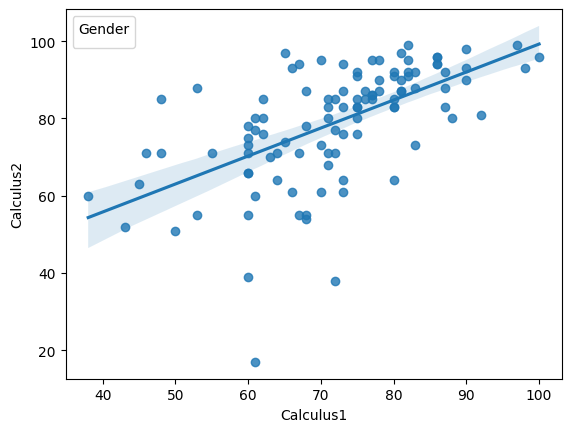

In [46]:
sns.regplot(x=df['Calculus1'], y = df['Calculus2'])
plt.legend (title='Gender')

<AxesSubplot: ylabel='Count'>

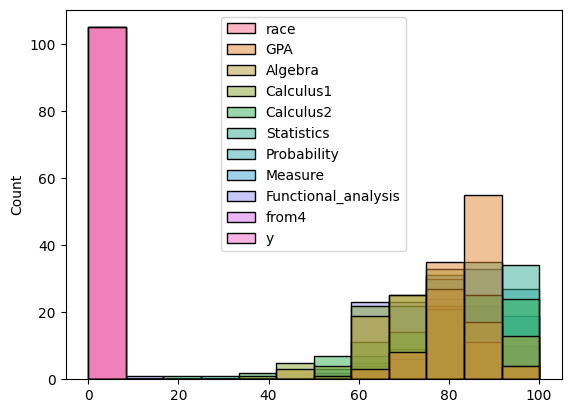

In [47]:
sns.histplot(data=df)

<AxesSubplot: ylabel='Density'>

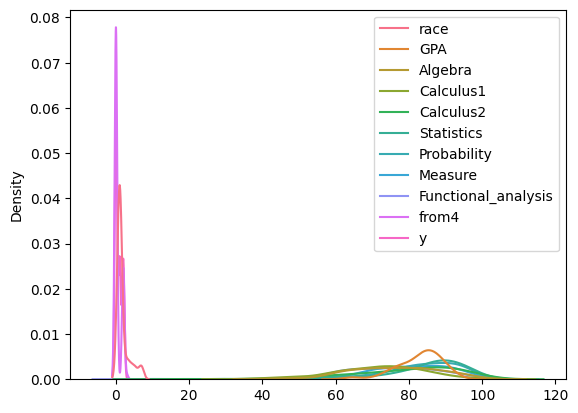

In [48]:
sns.kdeplot(data=df)

<AxesSubplot: xlabel='Probability', ylabel='Calculus2'>

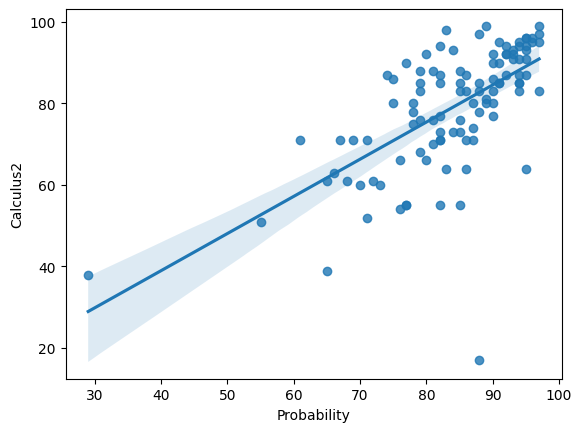

In [49]:
sns.regplot(x=df['Probability'], y= df['Calculus2'])

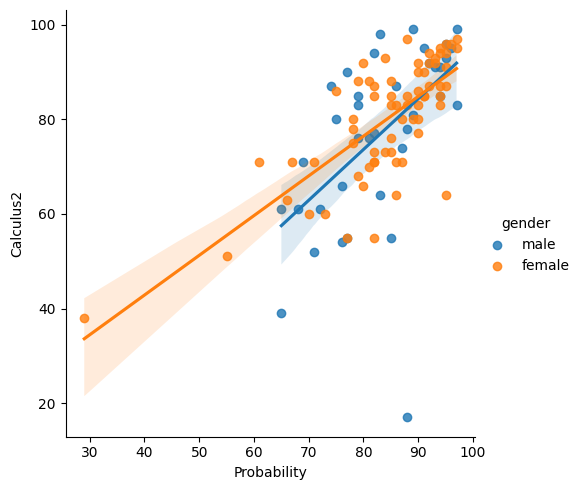

In [50]:
sns.lmplot(x='Probability', y= 'Calculus2', hue='gender', data=df)

In [51]:
df.head(10)

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0
1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1
1148,A,female,5,64.75,60,38,60,63,70,68,51,H,B,C,0,0
1149,B,female,5,77.92,61,60,66,68,80,78,71,I,B,A,0,0


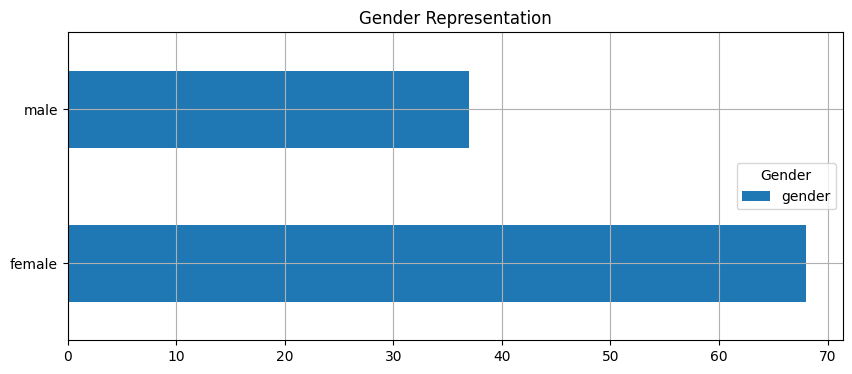

In [52]:
df['gender'].value_counts().plot(kind='barh', grid=True, fontsize=10, figsize=(10,4), title= 'Gender Representation')
plt.legend(title='Gender', fontsize=10, loc='right')
plt.show()

In [53]:
df.gender.unique()

array(['male', 'female'], dtype=object)

In [54]:
df.columns

Index(['class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1', 'Calculus2',
       'Statistics', 'Probability', 'Measure', 'Functional_analysis', 'from1',
       'from2', 'from3', 'from4', 'y'],
      dtype='object')

In [55]:
Gen = pd.DataFrame(columns=[
    'Gender', 'Avg_GPA', 'Algebra_Avg', 'Cal1_Avg','Cal2_Avg', 'Stats_Avg', 'Probs_Avg', 'Measure_Avg', 'Func_Avg', '' 
])

In [56]:
Gen

,Gender,Avg_GPA,Algebra_Avg,Cal1_Avg,Cal2_Avg,Stats_Avg,Probs_Avg,Measure_Avg,Func_Avg,


In [57]:
Gen.loc[1] = {
    'Gender' : 'Male', 
    'Avg_GPA' : df_male.GPA.mean(),
    'Algebra_Avg' : df_male.Algebra.mean(),
    'Cal1_Avg' : df_male.Calculus1.mean(),
    'Cal2_Avg' : df_male.Calculus2.mean(),
    'Stats_Avg' : df_male.Statistics.mean(),
    'Probs_Avg' : df_male.Probability.mean(),
    'Measure_Avg' : df_male.Measure.mean(),
    'Func_Avg' : df_male.Functional_analysis.mean()
}

In [58]:
Gen.loc[2] = {
    'Gender' : 'Female', 
    'Avg_GPA' : df_female.GPA.mean(),
    'Algebra_Avg' : df_female.Algebra.mean(),
    'Cal1_Avg' : df_female.Calculus1.mean(),
    'Cal2_Avg' : df_female.Calculus2.mean(),
    'Stats_Avg' : df_female.Statistics.mean(),
    'Probs_Avg' : df_female.Measure.mean(),
    'Measure_Avg' : df_female.Measure.mean(),
    'Func_Avg': df_female.Functional_analysis.mean()
}

In [59]:
Gen

,Gender,Avg_GPA,Algebra_Avg,Cal1_Avg,Cal2_Avg,Stats_Avg,Probs_Avg,Measure_Avg,Func_Avg,
1,Male,81.852162,76.513514,74.594595,76.783784,85.027027,82.945946,79.837838,73.243243,NaN
2,Female,83.558235,75.808824,70.529412,80.117647,85.191176,81.264706,81.264706,76.455882,NaN


In [60]:
Gen = Gen.set_index('Gender')

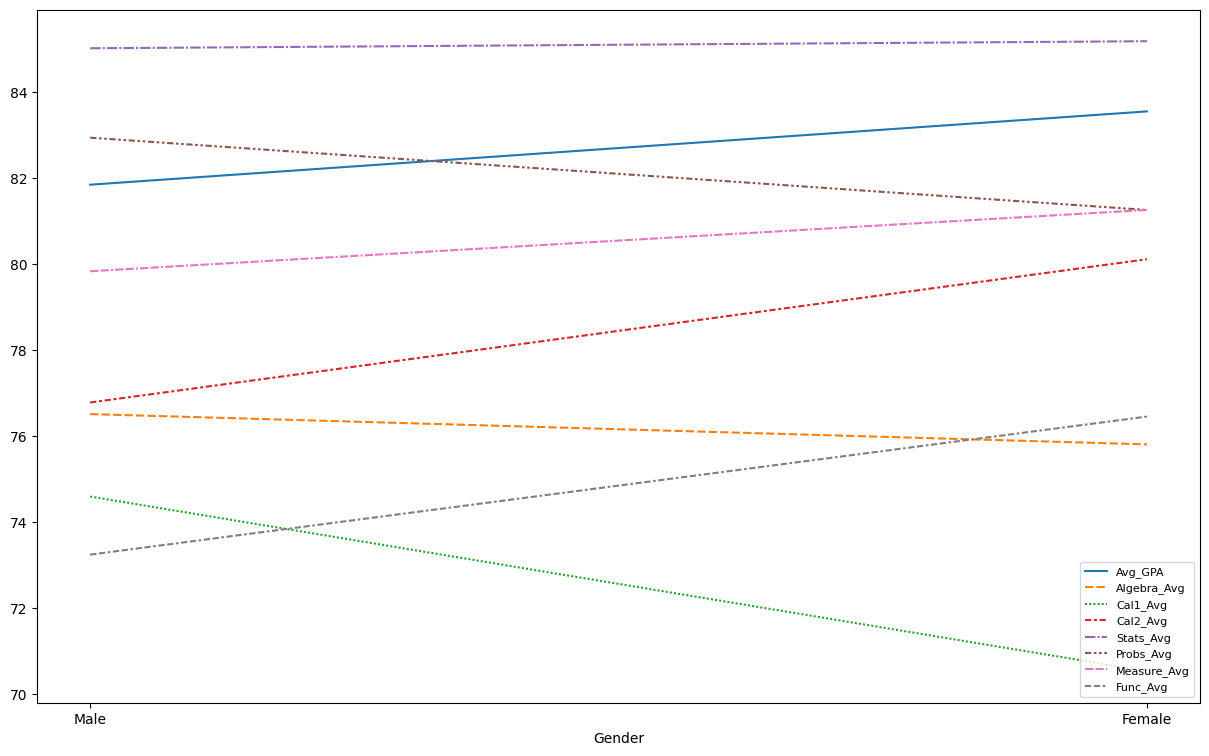

In [61]:
plt.figure(figsize=(15,9))
sns.lineplot(data=Gen)
plt.legend(loc='lower right', fontsize=8)

In [62]:
Gen

,Avg_GPA,Algebra_Avg,Cal1_Avg,Cal2_Avg,Stats_Avg,Probs_Avg,Measure_Avg,Func_Avg,
Gender,,,,,,,,,
Male,81.852162,76.513514,74.594595,76.783784,85.027027,82.945946,79.837838,73.243243,NaN
Female,83.558235,75.808824,70.529412,80.117647,85.191176,81.264706,81.264706,76.455882,NaN


c:\users\kodaks\appdata\local\programs\python\python39\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\users\kodaks\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


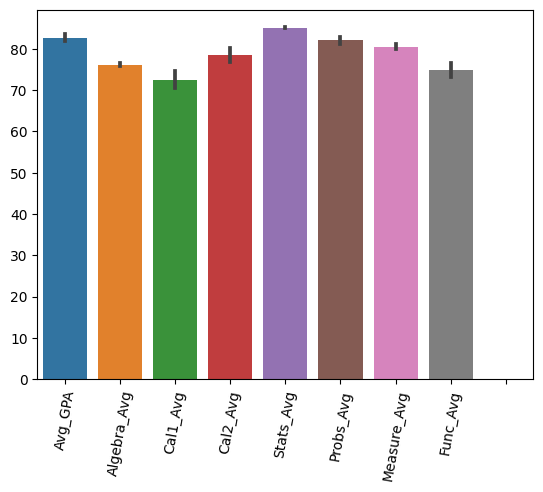

In [63]:
sns.barplot(data=Gen)
plt.xticks(rotation=80)
plt.show()

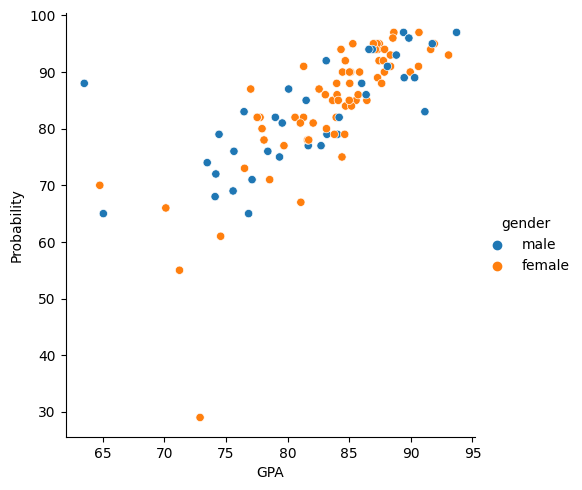

In [64]:
sns.relplot(x='GPA', y='Probability', hue='gender', data = df)

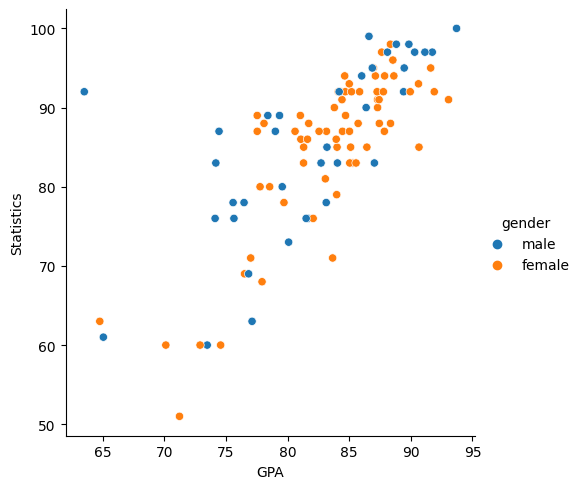

In [65]:
sns.relplot(x='GPA', y='Statistics', hue='gender', data=df)

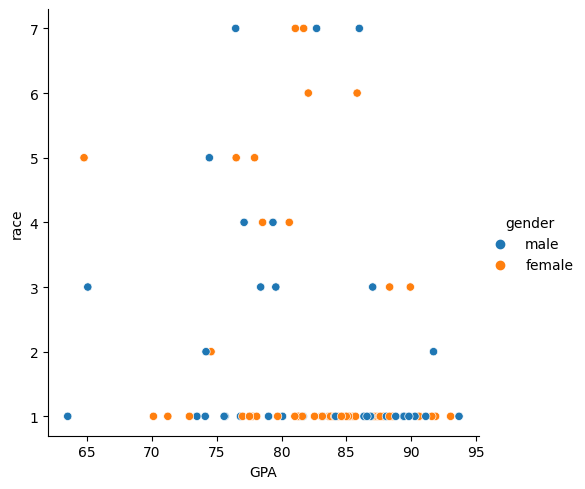

In [66]:
sns.relplot(x='GPA', y='race', hue='gender', data=df)

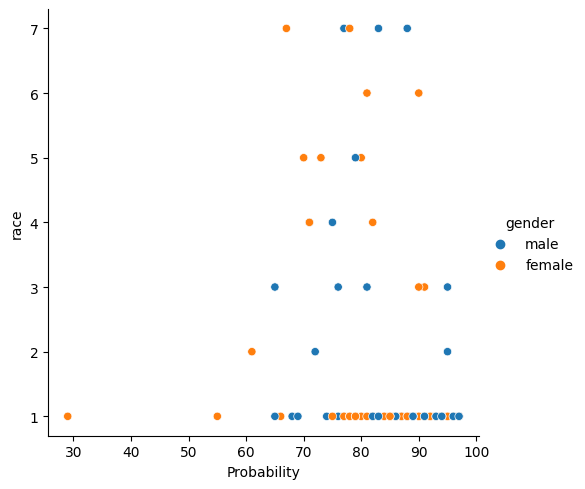

In [67]:
sns.relplot(x='Probability', y='race', hue='gender', data=df)

In [68]:
train = df.drop('GPA', axis = 1)
test = df['GPA']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.35, random_state=2)

In [70]:
df.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [71]:
X_train.shape

(68, 15)

In [72]:
X_test.shape

(37, 15)

In [73]:
y_train.shape

(68,)

In [74]:
X_train[['class', 'gender', 'race', 'Algebra', 'Calculus1',
         'Calculus2', 'Statistics', 'Probability', 'Measure',
         'Functional_analysis','from1','from2','from3', 'from4', 'y']] = X_train[['class', 'gender', 'race', 'Algebra', 'Calculus1',
         'Calculus2', 'Statistics', 'Probability', 'Measure',
         'Functional_analysis','from1','from2','from3', 'from4', 'y']].apply(LabelEncoder().fit_transform)

In [75]:
X_train

,class,gender,race,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,
1147,0,1,3,1,1,1,1,5,6,12,5,0,0,0,1
1229,0,0,0,21,28,26,17,26,24,17,4,1,4,0,1
1195,0,0,0,6,7,12,12,10,10,3,8,1,0,0,2
1237,0,1,1,29,35,28,19,27,23,28,2,1,4,0,2
1245,0,1,0,28,33,30,22,29,20,26,9,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,0,0,6,5,6,10,10,2,6,11,5,0,0,0,0
1163,1,0,0,11,15,2,6,9,3,10,1,1,3,1,0
1213,0,1,0,25,29,17,16,29,17,9,22,1,3,0,0


In [76]:
regr = LinearRegression()

In [77]:
regr.fit(X_train, y_train)

LinearRegression()

In [78]:
X_test[['class', 'gender', 'race', 'Algebra', 'Calculus1',
         'Calculus2', 'Statistics', 'Probability', 'Measure',
         'Functional_analysis','from1','from2','from3', 'from4', 'y']] = X_test[['class', 'gender', 'race', 'Algebra', 'Calculus1',
         'Calculus2', 'Statistics', 'Probability', 'Measure',
         'Functional_analysis','from1','from2','from3', 'from4', 'y']].apply(LabelEncoder().fit_transform)

In [79]:
pred = regr.predict(X_test)

In [80]:
pred

array([84.9532167 , 87.35779899, 76.3189817 , 77.32043919, 72.08751961,
       75.89287974, 74.7856262 , 75.88389237, 81.68346907, 75.94789218,
       81.60216404, 86.12620668, 84.68507834, 74.57249207, 75.86744418,
       81.75814495, 73.05059731, 80.28618113, 86.8658097 , 78.58678743,
       80.5316371 , 80.75111849, 83.65778035, 83.10619148, 84.2256841 ,
       84.10135534, 70.44801323, 77.37080037, 81.0451399 , 80.30727007,
       79.53817749, 85.67184394, 71.96711931, 75.10909582, 83.13650271,
       84.36871788, 81.19913237])

In [81]:
regr.score(X_test, y_test)

0.6217171833766542

In [82]:
regr.score(X_train, y_train)

0.8615595034620737

In [83]:
df.dtypes

class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object